# 结果展示

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import os

%matplotlib inline
from utils import config
from utils.simple_backtest import simple_backtest_plot, get_baseline

## 数据读取

In [2]:
root_path = os.getcwd()
root_path = os.path.join(root_path, "learn", "trade_file")
print("root_path: ", root_path)

root_path:  /Users/liuan/NUS/ME5406 Deep Learning for robotics /project2/StockRL/learn/trade_file


In [3]:
path_dict = {}
for model in config.MODEL_LIST:
    path_dict[model] = os.path.join(root_path, "account_value_{}.csv".format(model))

In [4]:
a2c_account_value = pd.read_csv(path_dict["a2c"])
ddpg_account_value = pd.read_csv(path_dict["ddpg"])
ppo_account_value = pd.read_csv(path_dict["ppo"])
sac_account_value = pd.read_csv(path_dict["sac"])
td3_account_value = pd.read_csv(path_dict["td3"])

## 获取 baseline 的结果

In [5]:
baseline_df = get_baseline(config.SSE_50_INDEX, 
              start="20230101",
              end="20250101")
start_close_value = baseline_df.iloc[0]['close']
baseline_df['processed_close'] = ((baseline_df['close'] - start_close_value)/start_close_value + 1) * 1e+6
baseline_df.head()

   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)


,tic,date,open,high,low,close,volume,day,processed_close
0,000016.SH,2023-01-03,2641.4218,2628.6723,2645.9915,2603.7234,30230100.0,1,1.000000e+06
1,000016.SH,2023-01-04,2651.0050,2644.2910,2659.5351,2637.7160,28065521.0,2,1.013055e+06
2,000016.SH,2023-01-05,2700.3082,2670.4576,2705.7388,2668.1451,27714894.0,3,1.024742e+06
3,000016.SH,2023-01-06,2713.6307,2704.2375,2721.9279,2698.9087,28367259.0,4,1.036557e+06
4,000016.SH,2023-01-09,2742.2014,2730.9952,2747.6106,2722.1459,29682897.0,0,1.045482e+06


## 展示最终的结果

In [6]:
result_account_value = pd.DataFrame(data = {
                                        'a2c': a2c_account_value['total_assets'], 
                                        'ddpg': ddpg_account_value['total_assets'],
                                        'ppo': ppo_account_value['total_assets'],
                                        'sac': sac_account_value['total_assets'],
                                        'td3': td3_account_value['total_assets'],
                                        'baseline': baseline_df['processed_close']
                                        })

In [7]:
result_account_value = result_account_value.iloc[:-1].apply(lambda x : (x - 1e+6)/1e+6)
final_returns = result_account_value.iloc[-1]
print("Final Returns")
final_returns_percent = final_returns * 100
final_returns_formatted = final_returns_percent.apply(lambda x: f"{x:.2f}%")
print(final_returns_formatted)

Final Returns
a2c         -3.44%
ddpg        14.99%
ppo          8.01%
sac         12.07%
td3         11.58%
baseline     3.71%
Name: 482, dtype: object


<Axes: >

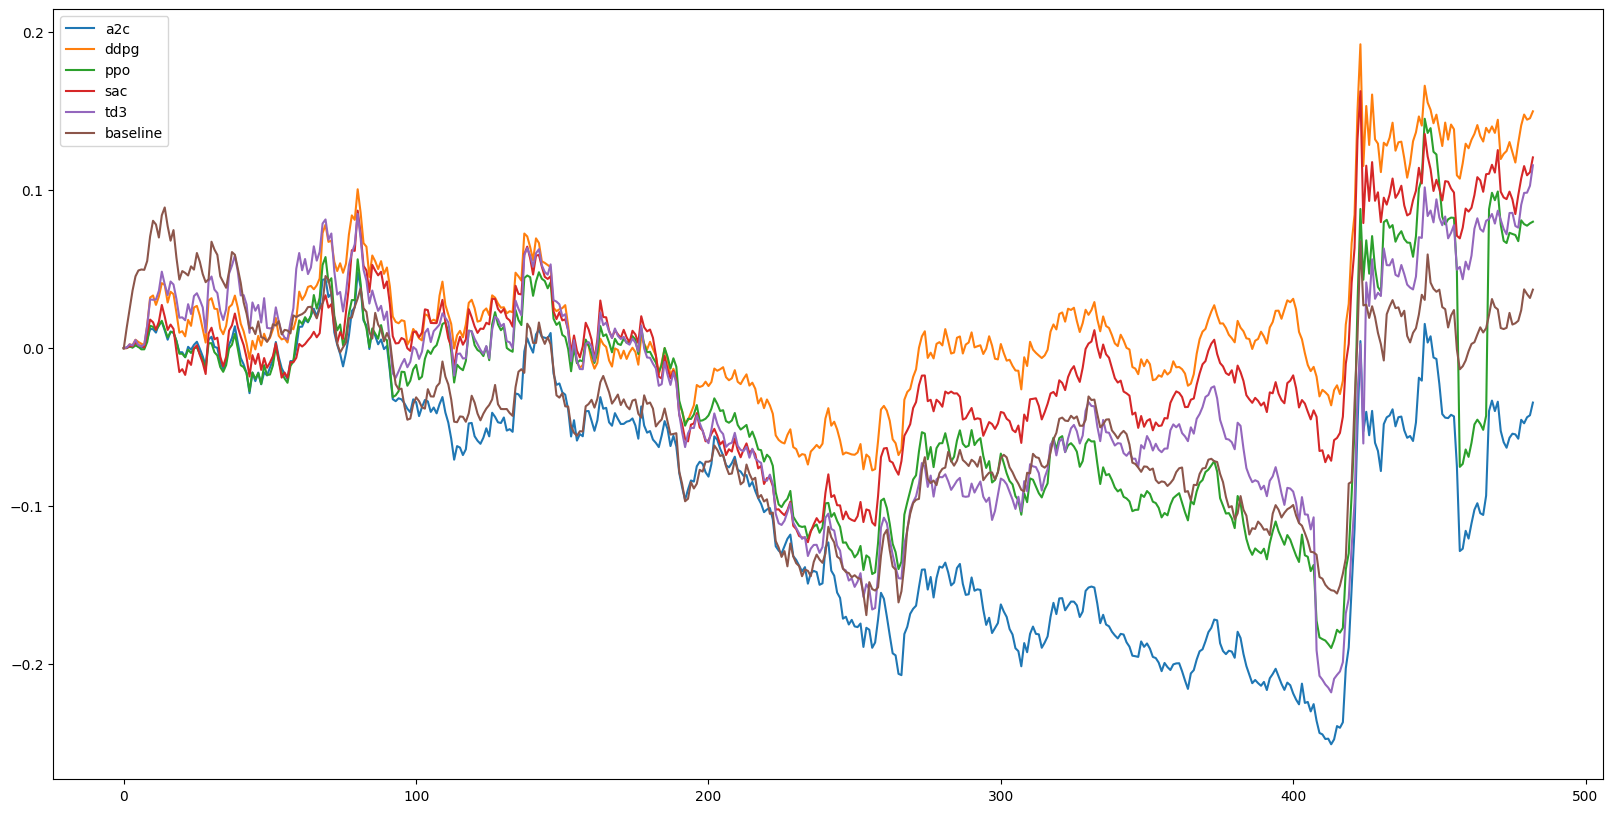

In [8]:
result_account_value.to_csv(os.path.join(root_path, "result_account_value.csv"), index=False)
result_account_value.plot(figsize = (20, 10))

## 展示 A2C 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)
账户价值数据日期范围: 2023-01-04 00:00:00 to 2024-12-31 00:00:00
基准指数数据日期范围: 2023-01-03 00:00:00 to 2024-12-31 00:00:00
共同日期数量: 483


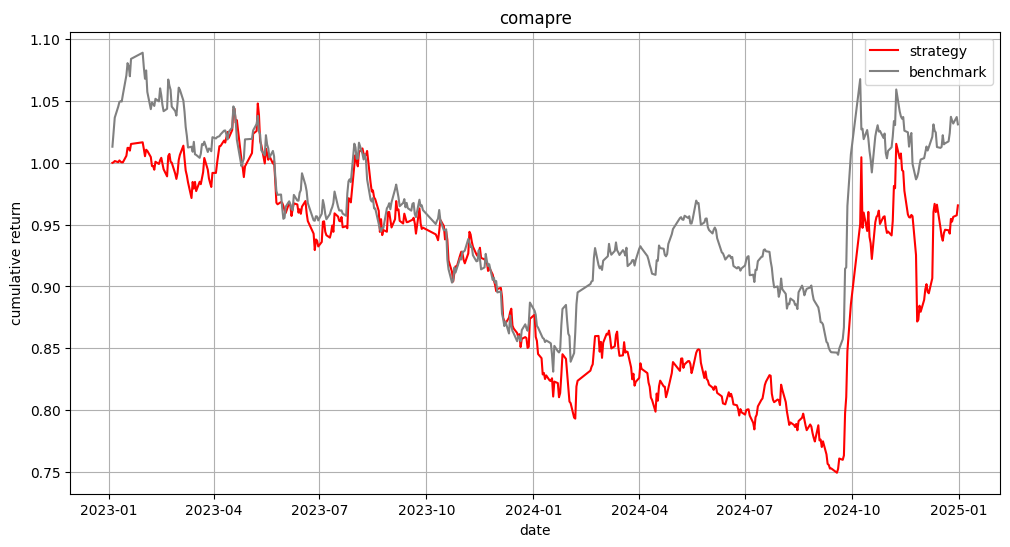

策略总收益率: -3.44%
基准总收益率: 1.78%
超额收益率: -5.23%
策略年化收益率: -1.74%
基准年化收益率: 0.89%
年化超额收益率: -2.64%
策略最大回撤: 28.50%
基准最大回撤: 23.69%


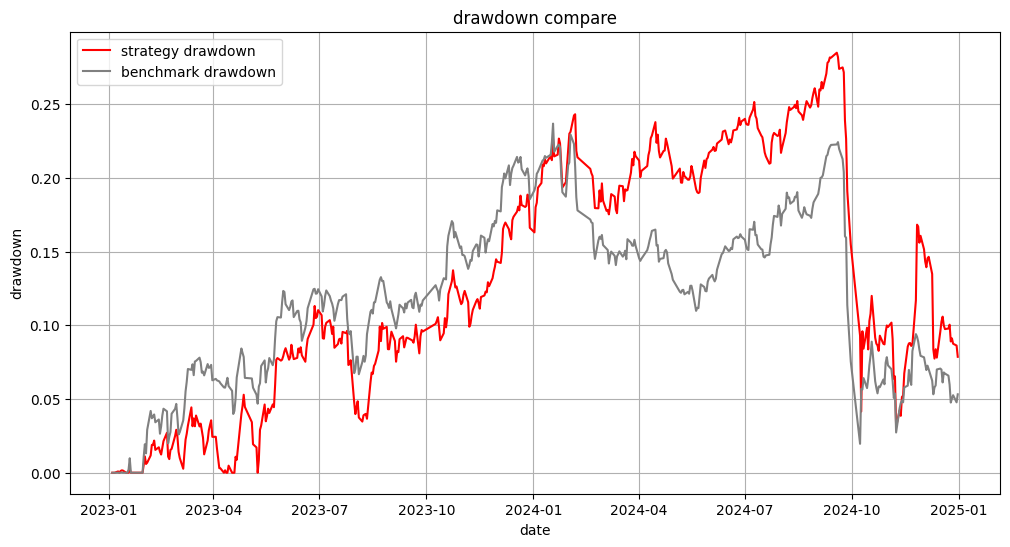

(                      cash    asset_value  total_assets    reward  cum_return  \
 date                                                                            
 2023-01-04  1000000.000000       0.000000  1.000000e+06  0.000000    1.000000   
 2023-01-05   919847.813554   80600.570001  1.000448e+06  0.000206    1.000448   
 2023-01-06   857075.834838  144365.385475  1.001441e+06  0.000617    1.001441   
 2023-01-09   828921.901975  171635.764194  1.000558e+06 -0.001282    1.000558   
 2023-01-10   772361.885501  229605.602315  1.001967e+06  0.001013    1.001967   
 ...                    ...            ...           ...       ...         ...   
 2024-12-25    45424.100185  909254.327417  9.546784e+05  0.003212    0.954678   
 2024-12-26    17974.591942  934497.627694  9.524722e+05 -0.011917    0.952472   
 2024-12-27    80540.134575  875741.813648  9.562819e+05 -0.004957    0.956282   
 2024-12-30     5731.121340  951829.702770  9.575608e+05 -0.007726    0.957561   
 2024-12-31    7

In [9]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
simple_backtest_plot(a2c_account_value,
        baseline_start="20230101",
        baseline_end="20250101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 DDPG 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)
账户价值数据日期范围: 2023-01-04 00:00:00 to 2024-12-31 00:00:00
基准指数数据日期范围: 2023-01-03 00:00:00 to 2024-12-31 00:00:00
共同日期数量: 483


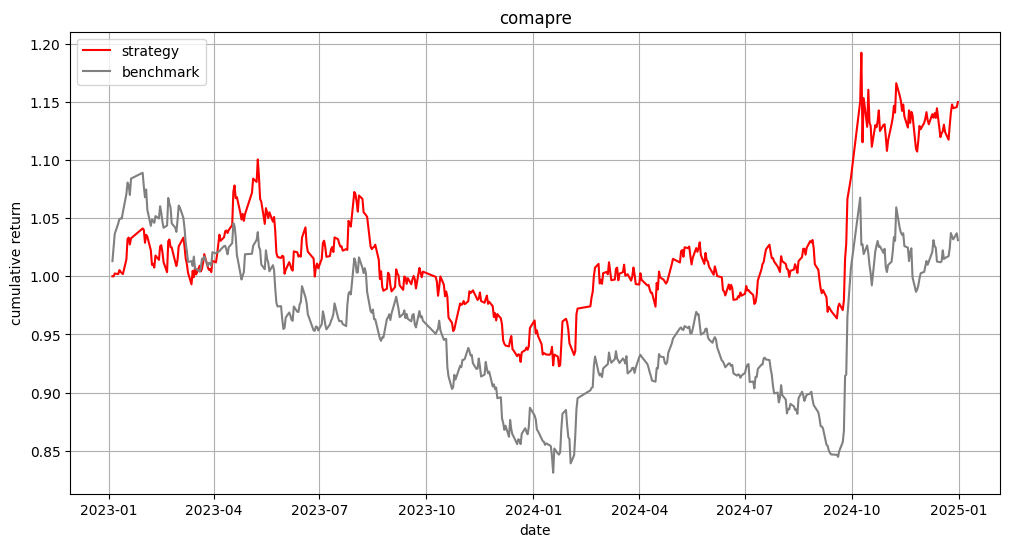

策略总收益率: 14.99%
基准总收益率: 1.78%
超额收益率: 13.21%
策略年化收益率: 7.26%
基准年化收益率: 0.89%
年化超额收益率: 6.37%
策略最大回撤: 16.17%
基准最大回撤: 23.69%


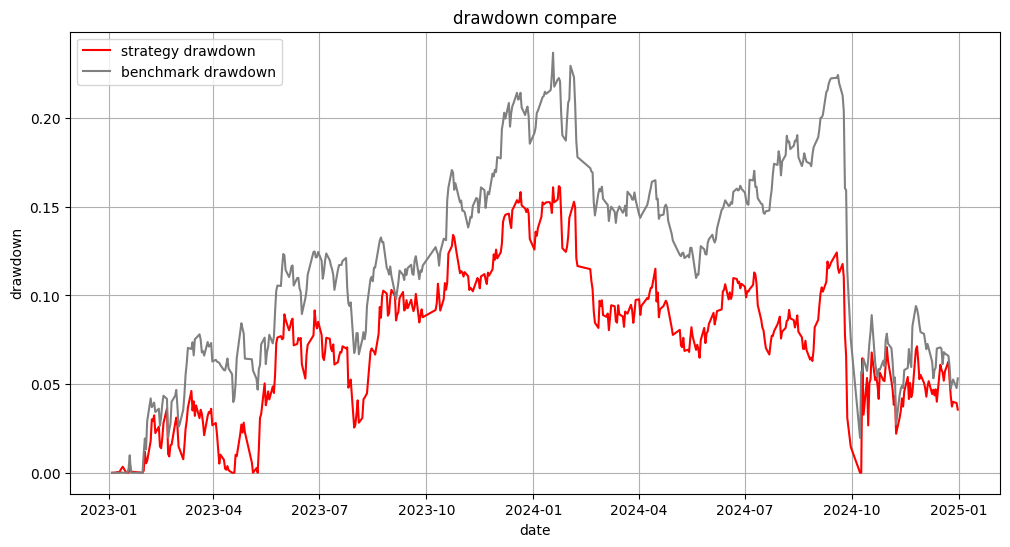

(                      cash   asset_value  total_assets    reward  cum_return  \
 date                                                                           
 2023-01-04  1000000.000000  0.000000e+00  1.000000e+06  0.000000    1.000000   
 2023-01-05   884655.001120  1.153489e+05  1.000004e+06 -0.000342    1.000004   
 2023-01-06   769269.506901  2.331578e+05  1.002427e+06  0.002041    1.002427   
 2023-01-09   678801.288716  3.231382e+05  1.001939e+06 -0.000954    1.001939   
 2023-01-10   578360.255288  4.269977e+05  1.005358e+06  0.002984    1.005358   
 ...                    ...           ...           ...       ...         ...   
 2024-12-25    76180.224138  1.064822e+06  1.141002e+06  0.005380    1.141002   
 2024-12-26    76180.224138  1.071698e+06  1.147878e+06  0.002279    1.147878   
 2024-12-27    81045.088972  1.063591e+06  1.144636e+06 -0.006843    1.144636   
 2024-12-30    81045.088972  1.064483e+06  1.145528e+06 -0.003147    1.145528   
 2024-12-31    86045.088807 

In [10]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
simple_backtest_plot(ddpg_account_value,
        baseline_start="20230101",
        baseline_end="20250101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 PPO 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)
账户价值数据日期范围: 2023-01-04 00:00:00 to 2024-12-31 00:00:00
基准指数数据日期范围: 2023-01-03 00:00:00 to 2024-12-31 00:00:00
共同日期数量: 483


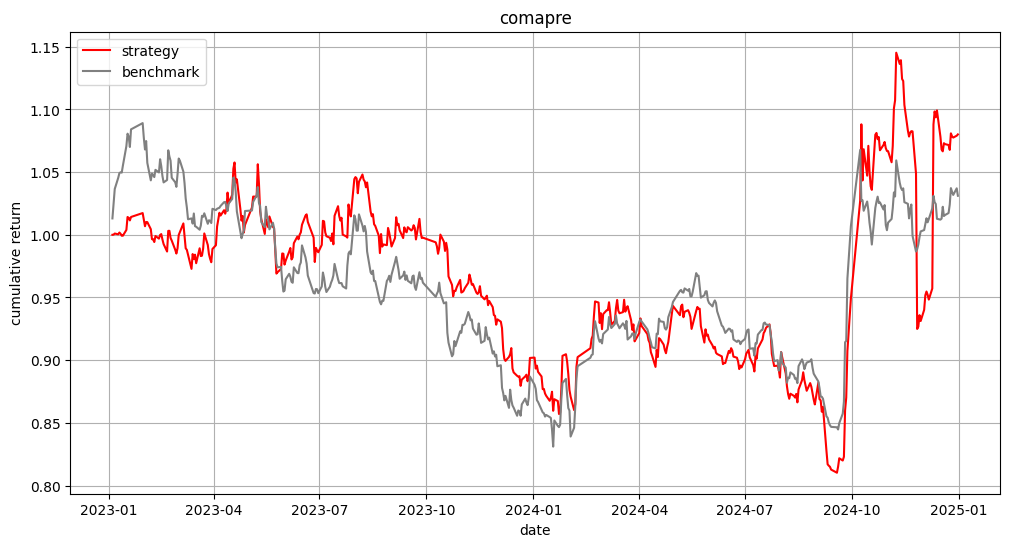

策略总收益率: 8.01%
基准总收益率: 1.78%
超额收益率: 6.22%
策略年化收益率: 3.94%
基准年化收益率: 0.89%
年化超额收益率: 3.05%
策略最大回撤: 23.39%
基准最大回撤: 23.69%


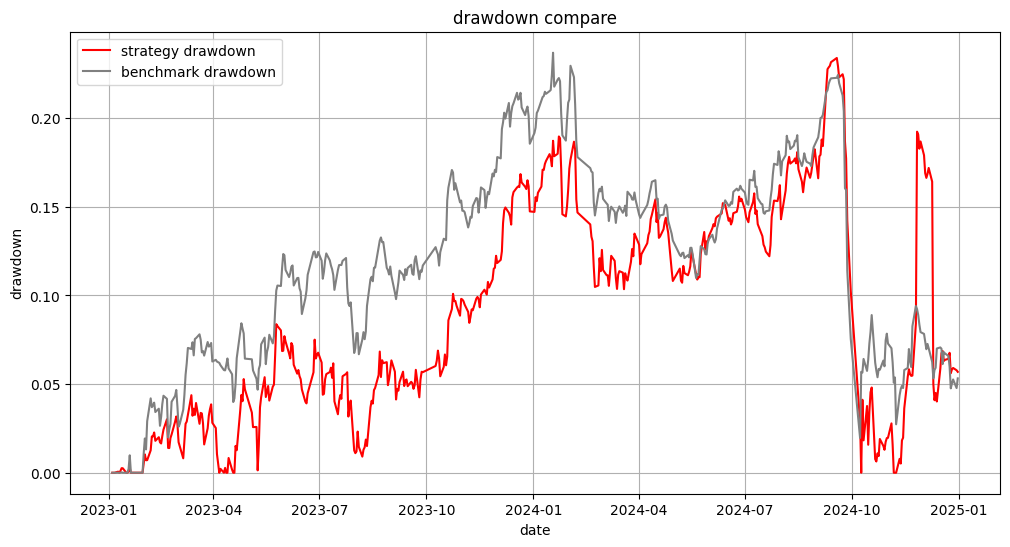

(                      cash   asset_value  total_assets    reward  cum_return  \
 date                                                                           
 2023-01-04  1000000.000000  0.000000e+00  1.000000e+06  0.000000    1.000000   
 2023-01-05   905100.319689  9.503111e+04  1.000131e+06 -0.000154    1.000131   
 2023-01-06   832358.867960  1.686318e+05  1.000991e+06  0.000493    1.000991   
 2023-01-09   788815.307840  2.115713e+05  1.000387e+06 -0.001079    1.000387   
 2023-01-10   785702.779453  2.161226e+05  1.001825e+06  0.001047    1.001825   
 ...                    ...           ...           ...       ...         ...   
 2024-12-25    65976.707276  1.014941e+06  1.080918e+06  0.006290    1.080918   
 2024-12-26    32926.587470  1.045589e+06  1.078515e+06 -0.008478    1.078515   
 2024-12-27     5343.219226  1.072197e+06  1.077540e+06 -0.007216    1.077540   
 2024-12-30    64785.224902  1.014237e+06  1.079022e+06 -0.004572    1.079022   
 2024-12-31    68477.382766 

In [11]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
simple_backtest_plot(ppo_account_value,
        baseline_start="20230101",
        baseline_end="20250101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 SAC 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)
账户价值数据日期范围: 2023-01-04 00:00:00 to 2024-12-31 00:00:00
基准指数数据日期范围: 2023-01-03 00:00:00 to 2024-12-31 00:00:00
共同日期数量: 483


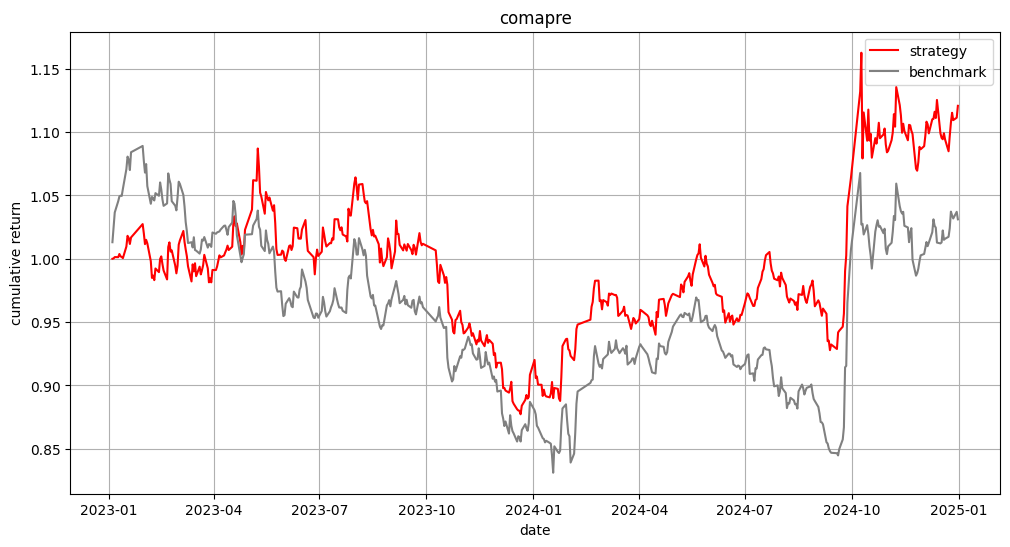

策略总收益率: 12.07%
基准总收益率: 1.78%
超额收益率: 10.29%
策略年化收益率: 5.89%
基准年化收益率: 0.89%
年化超额收益率: 5.00%
策略最大回撤: 19.30%
基准最大回撤: 23.69%


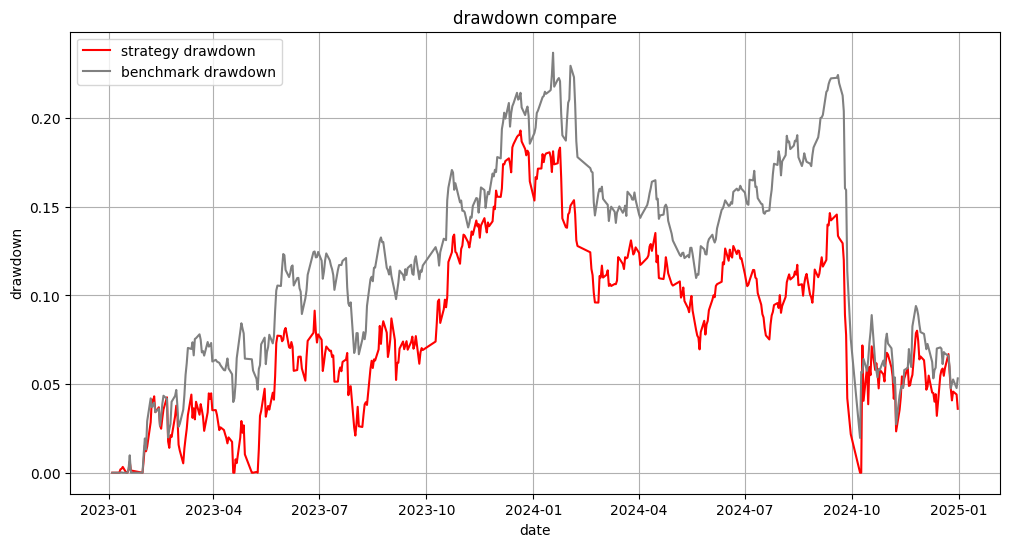

(                      cash   asset_value  total_assets    reward  cum_return  \
 date                                                                           
 2023-01-04  1000000.000000  0.000000e+00  1.000000e+06  0.000000    1.000000   
 2023-01-05   914745.000722  8.552198e+04  1.000267e+06  0.000010    1.000267   
 2023-01-06   819294.982525  1.820241e+05  1.001319e+06  0.000734    1.001319   
 2023-01-09   768934.983129  2.323260e+05  1.001261e+06 -0.000423    1.001261   
 2023-01-10   673586.392386  3.301637e+05  1.003750e+06  0.002135    1.003750   
 ...                    ...           ...           ...       ...         ...   
 2024-12-25    58263.385411  1.049132e+06  1.107396e+06  0.004784    1.107396   
 2024-12-26    58263.385411  1.056988e+06  1.115251e+06  0.002990    1.115251   
 2024-12-27    58263.385411  1.051181e+06  1.109445e+06 -0.009798    1.109445   
 2024-12-30    58263.385411  1.053104e+06  1.111367e+06 -0.002681    1.111367   
 2024-12-31    58263.385411 

In [12]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
simple_backtest_plot(sac_account_value,
        baseline_start="20230101",
        baseline_end="20250101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 TD3 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)
账户价值数据日期范围: 2023-01-04 00:00:00 to 2024-12-31 00:00:00
基准指数数据日期范围: 2023-01-03 00:00:00 to 2024-12-31 00:00:00
共同日期数量: 483


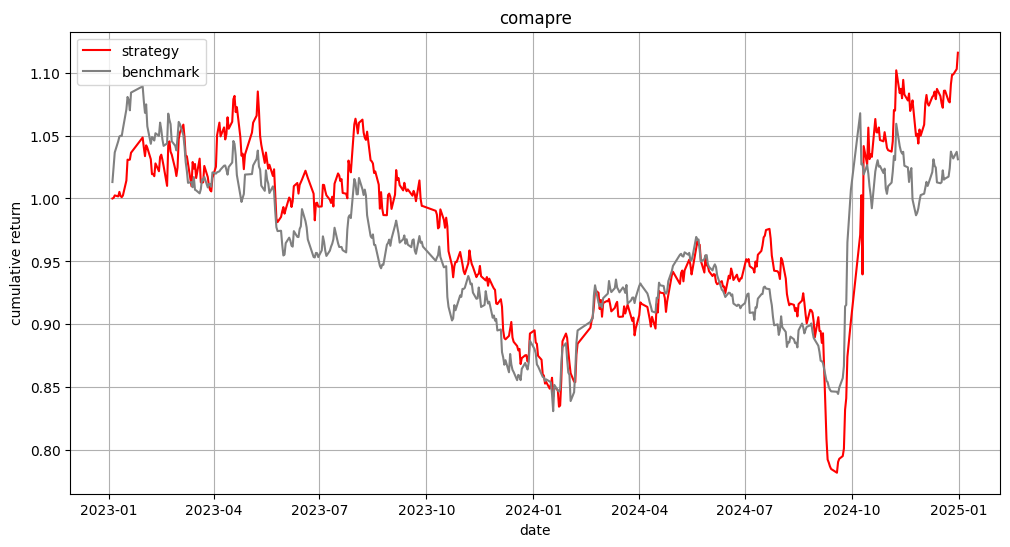

策略总收益率: 11.58%
基准总收益率: 1.78%
超额收益率: 9.79%
策略年化收益率: 5.65%
基准年化收益率: 0.89%
年化超额收益率: 4.76%
策略最大回撤: 27.91%
基准最大回撤: 23.69%


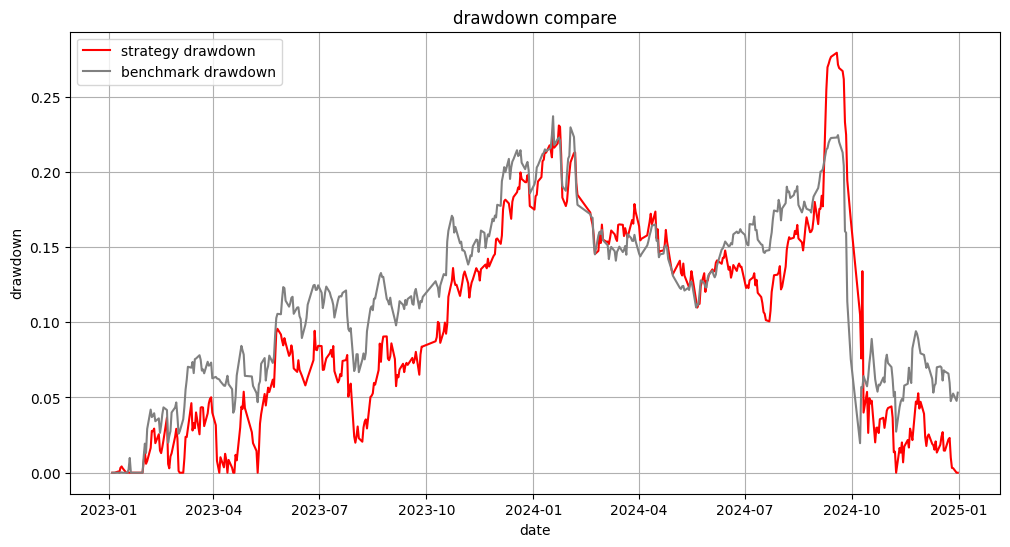

(                      cash   asset_value  total_assets    reward  cum_return  \
 date                                                                           
 2023-01-04  1000000.000000  0.000000e+00  1.000000e+06  0.000000    1.000000   
 2023-01-05   879639.999986  1.208056e+05  1.000446e+06  0.000083    1.000446   
 2023-01-06   769250.000433  2.331873e+05  1.002437e+06  0.001595    1.002437   
 2023-01-09   643785.001820  3.578744e+05  1.001659e+06 -0.001317    1.001659   
 2023-01-10   523345.800961  4.819027e+05  1.005249e+06  0.003124    1.005249   
 ...                    ...           ...           ...       ...         ...   
 2024-12-25   104409.001912  9.863089e+05  1.090718e+06  0.012290    1.090718   
 2024-12-26   104409.001912  9.938640e+05  1.098273e+06  0.006583    1.098273   
 2024-12-27   104409.001912  9.940286e+05  1.098438e+06 -0.000155    1.098438   
 2024-12-30   104409.001912  9.984120e+05  1.102821e+06  0.003983    1.102821   
 2024-12-31   104409.001912 

In [13]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
simple_backtest_plot(td3_account_value,
        baseline_start="20230101",
        baseline_end="20250101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )